In [1]:
import numpy as np
import pandas as pd

In [2]:
data_train=pd.read_csv("C:\\Users\\hsing\\Downloads\\project\\twitter_training.csv")
data_test=pd.read_csv("C:\\Users\\hsing\\Downloads\\project\\twitter_validation.csv")
data=pd.concat([data_train, data_test], ignore_index=False)
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,",3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,2401.0,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN
1,2401.0,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN
2,2401.0,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN
3,2401.0,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN
4,2401.0,Borderlands,Positive,im getting into borderlands and i can murder y...,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75680 entries, 0 to 998
Data columns (total 8 columns):
 #   Column                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                              --------------  -----  
 0   2401                                                                                                                                                                                                                                                74681 non-null  float64
 1   Borderlands                                                                

In [4]:
# Remove unnecessary columns
columns_to_drop = ['2401', '3364', 'Facebook', 'Irrelevant',
                   'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣']
data = data.drop(columns_to_drop, axis=1)

# Rename columns
data = data.rename(columns={'im getting on borderlands and i will murder you all ,': 'Tweet', 'Positive': 'Sentiment', 'Borderlands':"Branch"})
data.head()

,Branch,Sentiment,Tweet
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
data.isnull().sum()

Branch        999
Sentiment     999
Tweet        1685
dtype: int64

In [6]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
994     True
995     True
996     True
997     True
998     True
Length: 75680, dtype: bool

In [7]:
data.dropna(inplace=True)

In [8]:
remove_duplicates = data.drop_duplicates()
data = remove_duplicates
# check duplicate values
data.duplicated().sum()

0

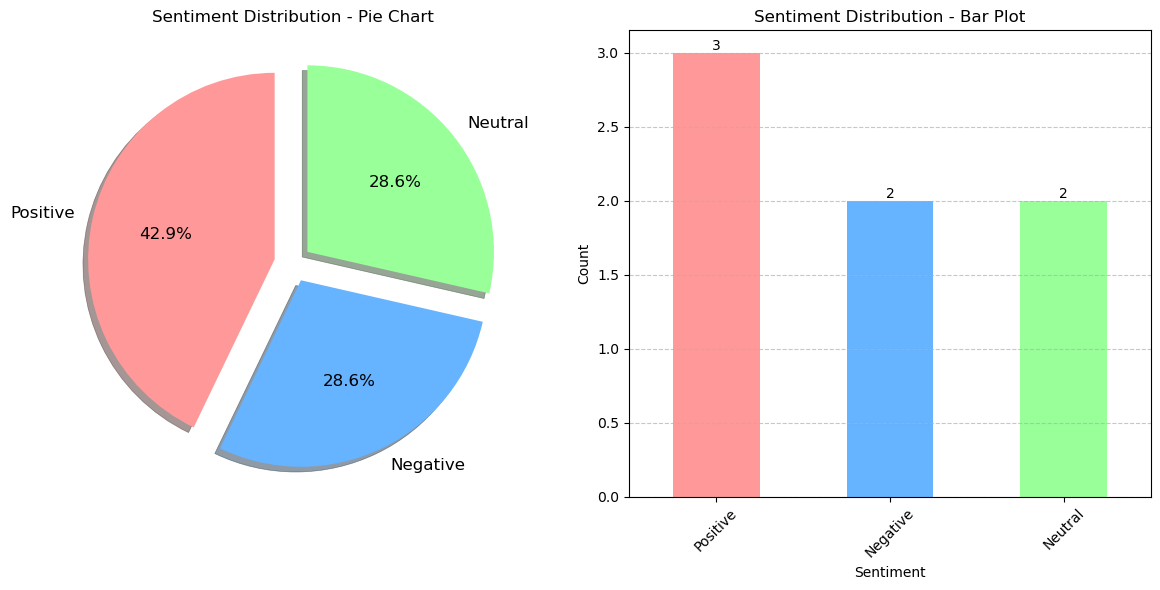

In [9]:
import matplotlib.pyplot as plt

# Sample data
df = pd.DataFrame({
    'Sentiment': ['Positive', 'Negative', 'Neutral', 'Positive', 'Negative', 'Positive', 'Neutral']
})
colors = ['#ff9999','#66b3ff','#99ff99']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting pie chart
sentiment_counts = df['Sentiment'].value_counts()
axs[0].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%',
           startangle=90, wedgeprops={'linewidth': 0.5}, textprops={'fontsize': 12},
           explode=[0.1] * len(sentiment_counts), colors=colors, shadow=True)
axs[0].set_title('Sentiment Distribution - Pie Chart')

# Plotting bar plot
sentiment_counts.plot(kind='bar', color=colors, ax=axs[1])
axs[1].set_title('Sentiment Distribution - Bar Plot')
axs[1].set_xlabel('Sentiment')
axs[1].set_ylabel('Count')
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Add text on top of each bar in the bar plot
for p in axs[1].patches:
    axs[1].annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


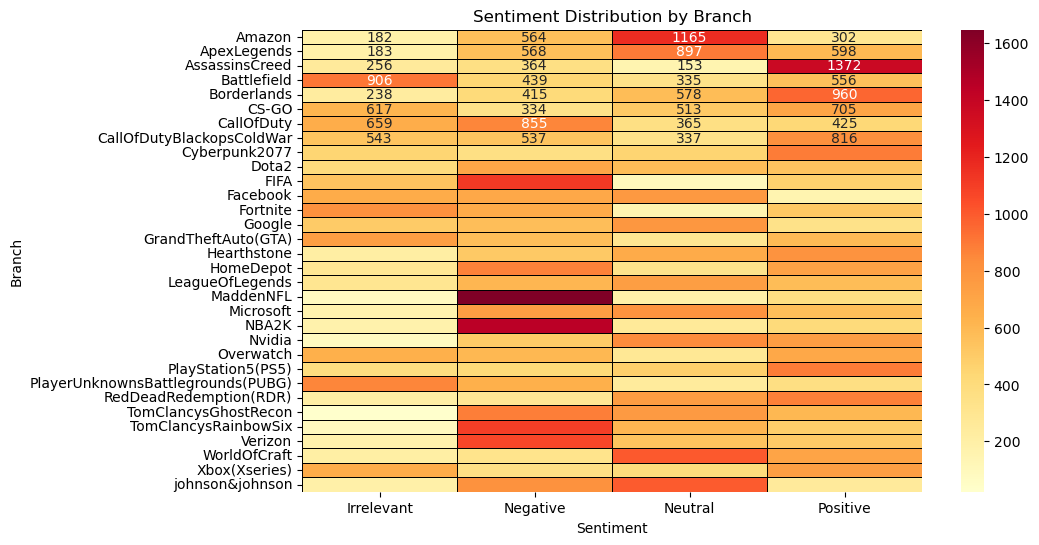

In [10]:
import seaborn as sns
# Create cross-tabulation table in plot
plt.figure(figsize=(10, 6))
count_table = pd.crosstab(index=data['Branch'], columns=data['Sentiment'])
sns.heatmap(count_table, cmap='YlOrRd', annot=True, fmt='d',linewidths=0.5, linecolor='black')
plt.title('Sentiment Distribution by Branch')
plt.xlabel('Sentiment')
plt.ylabel('Branch')
plt.show()

In [11]:
def filter_non_string(data, column):
    """
    Filter out rows with non-string values in the specified column.
    Convert non-string values to strings.
    """
    data = data.dropna(subset=[column])
    data[column] = data[column].astype(str)
    return data

In [12]:
data['Tweet'] = data['Tweet'].str.lower()

In [13]:
def remove_urls(text):
    """Remove URLs or hyperlinks from the text."""
    return re.sub(r'http\S+|www\S+', '', text)

In [14]:
import nltk
# Download the WordNet resource
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hsing\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hsing\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hsing\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hsing\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [15]:
def remove_numbers(text):
    """Exclude numerical digits from the text."""
    return re.sub(r'\d+', '', text)

In [16]:
def tokenize_text(text):
    """Split the text into individual words or tokens."""
    return word_tokenize(text)

In [17]:
def remove_stopwords(tokens):
    """Eliminate common stopwords from the tokenized text."""
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word not in stop_words]

In [18]:
def vectorize_data(text_data):
    # Join the tokenized text into strings
    text_data_strings = [" ".join(tokens) for tokens in text_data]
    # Initialize TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()
    # Fit and transform the text data to generate TF-IDF vectors
    tfidf_vectors = tfidf_vectorizer.fit_transform(text_data_strings)
    return tfidf_vectors, tfidf_vectorizer

In [19]:
pip install beautifulsoup4


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
import re

def remove_html_tags(text):
    """Remove HTML tags from a string using regular expressions."""
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)




In [21]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    """Remove HTML tags from a string using BeautifulSoup."""
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()



In [22]:
def remove_punctuation(text):
    """Remove punctuation marks from the text."""
    return text.translate(str.maketrans('', '', string.punctuation))

In [23]:
import string

In [24]:
def preprocess_text(data):
    data = filter_non_string(data, 'Tweet')
    data['Tweet'] = data['Tweet'].apply(remove_html_tags)
    data['Tweet'] = data['Tweet'].apply(remove_urls)
    data['Tweet'] = data['Tweet'].apply(remove_numbers)
    data['Tweet'] = data['Tweet'].apply(remove_punctuation)
    data['Tweet'] = data['Tweet'].apply(tokenize_text)
    data['Tweet'] = data['Tweet'].apply(remove_stopwords)
    return data

df_processed = preprocess_text(data)


C:\Users\hsing\AppData\Local\Temp\ipykernel_12156\2667741351.py:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
# Combine list of words into a single string for each tweet
df_processed['Tweet'] = df_processed['Tweet'].str.join(' ')

# Separate the data into features (X) and target (y)
X = df_processed['Tweet']  # Features: the text data (tweets)
y = df_processed['Sentiment']  # Target: the sentiment labels

#Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (56765,)
Shape of X_test: (14192,)
Shape of y_train: (56765,)
Shape of y_test: (14192,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Predict on the testing data
y_pred = rf_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.905228297632469


In [28]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy (Naive Bayes): {accuracy_nb:.2f}')

# Print classification report
print('Classification Report (Naive Bayes):')
print(classification_report(y_test, y_pred_nb))

# Print confusion matrix
print('Confusion Matrix (Naive Bayes):')
print(confusion_matrix(y_test, y_pred_nb))


Accuracy (Naive Bayes): 0.71
Classification Report (Naive Bayes):
              precision    recall  f1-score   support

  Irrelevant       0.95      0.39      0.55      2511
    Negative       0.64      0.91      0.75      4296
     Neutral       0.85      0.60      0.70      3498
    Positive       0.68      0.81      0.74      3887

    accuracy                           0.71     14192
   macro avg       0.78      0.68      0.69     14192
weighted avg       0.76      0.71      0.70     14192

Confusion Matrix (Naive Bayes):
[[ 982  785  138  606]
 [  15 3900  106  275]
 [  15  809 2088  586]
 [  21  584  119 3163]]


In [29]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_dt = dt_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy (Decision Tree): {accuracy_dt:.2f}')

# Print classification report
print('Classification Report (Decision Tree):')
print(classification_report(y_test, y_pred_dt))

# Print confusion matrix
print('Confusion Matrix (Decision Tree):')
print(confusion_matrix(y_test, y_pred_dt))

Accuracy (Decision Tree): 0.78
Classification Report (Decision Tree):
              precision    recall  f1-score   support

  Irrelevant       0.78      0.71      0.75      2511
    Negative       0.81      0.82      0.82      4296
     Neutral       0.81      0.74      0.77      3498
    Positive       0.74      0.83      0.78      3887

    accuracy                           0.78     14192
   macro avg       0.78      0.77      0.78     14192
weighted avg       0.78      0.78      0.78     14192

Confusion Matrix (Decision Tree):
[[1790  219  149  353]
 [ 156 3533  237  370]
 [ 165  343 2576  414]
 [ 181  258  232 3216]]
